# FAI Homework 7

**FBA Quant 이의형**

---

## Problem 1. Fundamental Value Factor

---

**(a)** Implement PBR based value factor portfolio with KOSPI stocks and compare the performance of the portfolio with the market (KOSPI).  
You can get the PBR data from http://data.krx.co.kr/contents/MDC/MDI/mdiLoader/index.cmd?menuId=MDC0201020502  

You should create a long-short portfolio based on PBR of stock.  
Percentile for to decide the position (long/short) and rebalancing frequency can be chosen manually.  
Performance should include annualized return, annualized standard deviation, Share ratio, Sortino ratio, drawdowns, and maximum drawdown.

### Data

In [1]:
import json
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pymysql

# KRX 차단으로 개인 DB 이용
class DBmgr:
    def __init__(self):
        with open('db_info.json', 'r') as json_file:
            db_info = json.load(json_file)
        self.conn = pymysql.connect(**db_info)
    
    def get_stock_data(self, table, code=None, start_date='0', end_date='3000_00_00', only_stock=False, only_ohlcv=False):
        """Return stock data in table"""
        start_date = int(re.sub(r'[^0-9]', '', start_date))
        end_date = int(re.sub(r'[^0-9]', '', end_date))
        
        stock_cond = "(sh7code LIKE 'A%') AND" if only_stock else ''
        ohlcv_cond = 'dateint, sh7code, open, high, low, close, vol' if only_ohlcv else '*'
        
        if code == None:
            sql = f"""
            SELECT {ohlcv_cond} FROM {table}
            WHERE {stock_cond} dateint BETWEEN '{start_date}' AND '{end_date}'
            """
        else:
            sh7code = f"'{code}'" if isinstance(code, str) else str(code)[1:-1]
            sql = f"""
            SELECT {ohlcv_cond} FROM {table} 
            WHERE {stock_cond} (sh7code IN ({sh7code})) AND (dateint BETWEEN '{start_date}' AND '{end_date}')
            """
        df = pd.read_sql(sql, self.conn)
        return df

In [2]:
dbm = DBmgr()

# 시가총액 데이터
all_stock_data = dbm.get_stock_data(table='daily_price', start_date='2020-04-06', end_date='2023-04-06', only_stock=True)
mc = pd.pivot_table(data=all_stock_data, values='mc', index='dateint', columns='sh7code')
mc.dropna(axis=1, inplace=True)
mc.index = pd.to_datetime(mc.index.astype(str))
mc.index.name = 'date'
mc

sh7code,A000020,A000040,A000050,A000070,A000075,A000080,A000087,A000100,A000105,A000120,...,A900280,A900290,A900300,A900310,A900340,A950110,A950130,A950140,A950160,A950170
date,,,,,,,,,,,,,,,,,,,,,
2020-04-06,2.008230e+11,3.419400e+10,2.146590e+11,3.900900e+11,9.788000e+09,2.068923e+12,1.604600e+10,3.001850e+12,5.004600e+10,2.999778e+12,...,4.334600e+10,1.010630e+11,5.237100e+10,6.696000e+10,7.459800e+10,1.972480e+11,1.712420e+11,7.728200e+10,4.895410e+11,1.499960e+11
2020-04-07,2.075270e+11,3.495200e+10,2.206900e+11,3.999380e+11,9.788000e+09,2.047883e+12,1.644100e+10,3.001850e+12,5.004600e+10,3.079620e+12,...,4.684000e+10,1.169100e+11,5.459100e+10,7.533000e+10,8.875000e+10,2.014390e+11,1.623440e+11,7.847400e+10,4.895410e+11,1.645230e+11
2020-04-08,2.136720e+11,3.954600e+10,2.226090e+11,3.982260e+11,9.788000e+09,2.065416e+12,1.655400e+10,3.112125e+12,5.287900e+10,3.102432e+12,...,5.017400e+10,1.196020e+11,7.087100e+10,8.478000e+10,8.875000e+10,2.034120e+11,1.667090e+11,7.847400e+10,4.895410e+11,1.697740e+11
2020-04-09,2.136720e+11,4.030400e+10,2.892280e+11,4.055050e+11,9.864000e+09,2.072430e+12,1.661100e+10,3.275974e+12,5.766000e+10,3.113838e+12,...,4.842700e+10,1.178930e+11,6.916300e+10,8.289000e+10,8.875000e+10,1.999600e+11,1.631840e+11,7.936800e+10,4.895410e+11,1.778250e+11
2020-04-10,2.159060e+11,3.912000e+10,2.960820e+11,4.106430e+11,9.925000e+09,2.037363e+12,1.661100e+10,3.245905e+12,5.901700e+10,3.079620e+12,...,4.890400e+10,1.212670e+11,6.603300e+10,8.262000e+10,8.659100e+10,1.967540e+11,1.599940e+11,8.066000e+10,4.895410e+11,1.795750e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-31,2.321060e+11,4.845300e+10,2.936140e+11,6.448690e+11,1.665900e+10,1.570979e+12,1.827200e+10,3.877882e+12,5.911800e+10,1.822678e+12,...,5.155600e+10,2.203160e+11,2.445400e+10,6.903600e+10,4.418300e+10,1.197780e+11,3.232030e+11,9.138800e+10,6.469710e+11,2.064320e+11
2023-04-03,2.318270e+11,5.672100e+10,2.930660e+11,6.517200e+11,1.678000e+10,1.602539e+12,1.836200e+10,3.854891e+12,5.900000e+10,1.781617e+12,...,5.196700e+10,2.196420e+11,2.426900e+10,6.903600e+10,4.490200e+10,1.200190e+11,3.232030e+11,9.109000e+10,6.538610e+11,2.071860e+11
2023-04-04,2.362960e+11,5.912400e+10,2.936140e+11,6.560020e+11,1.690200e+10,1.585005e+12,1.843000e+10,3.939193e+12,5.935400e+10,1.808991e+12,...,5.361000e+10,2.250320e+11,2.501000e+10,6.993200e+10,4.615000e+10,1.250700e+11,3.362760e+11,9.198400e+10,6.855550e+11,2.066830e+11


In [3]:
data_path = 'C:/Users/uhlee/data/'

# 지수 데이터
index_stocks = pd.read_csv(data_path + 'index_stocks.csv', index_col=0, parse_dates=True)
# 기업별 자본 데이터
eq = pd.read_csv(data_path + 'eq.csv', index_col=0)
# 섹터 데이터: 실제로는 일별 섹터 구분 데이터가 필요
sector = pd.read_csv(data_path + 'sector.csv', index_col=0)

itst_stocks = set(mc.columns).intersection(set(index_stocks.columns))
itst_stocks = itst_stocks.intersection(set(eq.columns))
itst_stocks = list(itst_stocks.intersection(set(sector.index)))

index_stocks = index_stocks.loc[:, itst_stocks]
mc = mc.loc[:, itst_stocks]
eq = eq.loc[:,itst_stocks]

In [4]:
def transform_daily_format(q_df, d_df):
    """분기별 보고서 공시에 따른 실제 트레이딩 날짜 -> 일별 데이터 포맷으로 변경"""
    d_df = pd.DataFrame().reindex_like(d_df)
    transform_dict = {'1':'05-20', '2':'08-20', '3':'11-20', '4':'04-06'}
    d_idx = []
    for q_idx in q_df.index:
        year = q_idx[:4]
        quarter = q_idx[-1]
        year = str(int(year)+1) if quarter == '4' else year
        date = f'{year}-{transform_dict[quarter]}'
        trd_day = d_df.loc[date:,:].index[0]
        d_df.loc[trd_day,:] = q_df.loc[q_idx,:].values
        d_idx.append(trd_day)
    d_df.fillna(method='ffill', axis=0, inplace=True)
    return d_df, d_idx

In [5]:
eq, rebal_dates = transform_daily_format(eq, mc)
eq

sh7code,A097520,A023350,A018500,A051910,A004090,A005930,A019680,A139130,A008730,A103140,...,A029780,A005250,A001270,A016590,A004910,A120030,A024720,A004360,A071950,A000720
date,,,,,,,,,,,,,,,,,,,,,
2020-04-06,224567.08198,115280.53009,57943.93349,17383789.0,138714.16014,262880421.0,613226.54840,5.407604e+06,341983.59459,1.383814e+06,...,6.896446e+06,1.506596e+06,485978.95917,573785.93747,172734.69027,110477.52829,600634.85109,8.262833e+05,25320.21983,8714982.0
2020-04-07,224567.08198,115280.53009,57943.93349,17383789.0,138714.16014,262880421.0,613226.54840,5.407604e+06,341983.59459,1.383814e+06,...,6.896446e+06,1.506596e+06,485978.95917,573785.93747,172734.69027,110477.52829,600634.85109,8.262833e+05,25320.21983,8714982.0
2020-04-08,224567.08198,115280.53009,57943.93349,17383789.0,138714.16014,262880421.0,613226.54840,5.407604e+06,341983.59459,1.383814e+06,...,6.896446e+06,1.506596e+06,485978.95917,573785.93747,172734.69027,110477.52829,600634.85109,8.262833e+05,25320.21983,8714982.0
2020-04-09,224567.08198,115280.53009,57943.93349,17383789.0,138714.16014,262880421.0,613226.54840,5.407604e+06,341983.59459,1.383814e+06,...,6.896446e+06,1.506596e+06,485978.95917,573785.93747,172734.69027,110477.52829,600634.85109,8.262833e+05,25320.21983,8714982.0
2020-04-10,224567.08198,115280.53009,57943.93349,17383789.0,138714.16014,262880421.0,613226.54840,5.407604e+06,341983.59459,1.383814e+06,...,6.896446e+06,1.506596e+06,485978.95917,573785.93747,172734.69027,110477.52829,600634.85109,8.262833e+05,25320.21983,8714982.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-31,329331.87968,145606.74497,83493.59909,38715110.0,160279.94864,344906889.0,502346.07845,6.139499e+06,331524.63496,1.824569e+06,...,7.804360e+06,1.952950e+06,709982.66715,670023.37131,172510.09585,136801.47484,869175.34931,9.527567e+05,19234.06271,10363143.0
2023-04-03,329331.87968,145606.74497,83493.59909,38715110.0,160279.94864,344906889.0,502346.07845,6.139499e+06,331524.63496,1.824569e+06,...,7.804360e+06,1.952950e+06,709982.66715,670023.37131,172510.09585,136801.47484,869175.34931,9.527567e+05,19234.06271,10363143.0
2023-04-04,329331.87968,145606.74497,83493.59909,38715110.0,160279.94864,344906889.0,502346.07845,6.139499e+06,331524.63496,1.824569e+06,...,7.804360e+06,1.952950e+06,709982.66715,670023.37131,172510.09585,136801.47484,869175.34931,9.527567e+05,19234.06271,10363143.0


In [6]:
start = '2020-04-06'
end = '2023-04-06'

index_stocks = index_stocks.loc[start:end,:]
mc = mc.loc[start:end,:]
eq = eq.loc[start:end,:]

sector_df = pd.DataFrame().reindex_like(mc)
sector_df.iloc[0,:] = sector.loc[itst_stocks].values.reshape(-1)
sector_df.fillna(method='ffill', axis=0, inplace=True)

adj_close = pd.pivot_table(data=all_stock_data, values='close', index='dateint', columns='sh7code')
adj_close.index = pd.to_datetime(adj_close.index.astype(str))
adj_close = adj_close.loc[start:end, mc.columns]
adj_close.index.name = 'date'

index_stocks.shape, mc.shape, eq.shape, sector_df.shape, adj_close.shape

((743, 762), (743, 762), (743, 762), (743, 762), (743, 762))

In [7]:
pbr = mc / (eq * 1_000_000)
pbr

sh7code,A097520,A023350,A018500,A051910,A004090,A005930,A019680,A139130,A008730,A103140,...,A029780,A005250,A001270,A016590,A004910,A120030,A024720,A004360,A071950,A000720
date,,,,,,,,,,,,,,,,,,,,,
2020-04-06,2.270983,0.368544,0.426826,1.204026,0.462375,1.105934,0.659547,0.140287,0.924606,0.373635,...,0.488030,0.691406,0.344581,0.372219,0.335682,0.907949,0.573408,0.186003,1.202320,0.357764
2020-04-07,2.505639,0.372812,0.463948,1.254786,0.451973,1.126372,0.674741,0.142789,0.924606,0.374649,...,0.488030,0.771004,0.347780,0.375729,0.346427,0.904537,0.583861,0.192780,1.238931,0.367351
2020-04-08,2.469846,0.373766,0.480896,1.271029,0.443949,1.103663,0.658856,0.141694,0.946361,0.366548,...,0.483830,0.721060,0.346715,0.384860,0.361989,0.903396,0.591328,0.194649,1.238931,0.366077
2020-04-09,2.477799,0.378989,0.508336,1.317728,0.452975,1.115018,0.657475,0.143727,0.989872,0.367560,...,0.482990,0.717939,0.348848,0.386967,0.364212,0.910230,0.595808,0.195583,1.299949,0.385880
2020-04-10,2.430071,0.383265,0.508336,1.315698,0.440662,1.118424,0.653331,0.153111,1.004376,0.373635,...,0.491390,0.711696,0.356316,0.389776,0.371251,0.904537,0.595808,0.198856,1.306071,0.391632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-31,1.708550,0.488817,0.528052,1.298240,0.814163,1.107737,0.440079,0.190097,3.037120,0.580579,...,0.451297,0.371321,0.288439,0.511212,0.535714,0.917008,0.326778,0.932209,1.065350,0.391666
2023-04-03,1.806804,0.494833,0.523561,1.298240,0.826835,1.092159,0.440079,0.186791,3.108185,0.596706,...,0.449812,0.366264,0.286396,0.516625,0.534972,0.918850,0.325495,0.935248,1.103927,0.404023
2023-04-04,1.779512,0.497841,0.534772,1.316474,0.910788,1.100813,0.442607,0.187066,3.242836,0.585955,...,0.451297,0.379027,0.289024,0.525044,0.539424,0.918850,0.323999,0.945381,1.129611,0.402411


In [8]:
rtn_1d = adj_close.pct_change(1, axis=0)
rtn_1d

sh7code,A097520,A023350,A018500,A051910,A004090,A005930,A019680,A139130,A008730,A103140,...,A029780,A005250,A001270,A016590,A004910,A120030,A024720,A004360,A071950,A000720
date,,,,,,,,,,,,,,,,,,,,,
2020-04-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-07,0.103327,0.011598,0.086957,0.042159,-0.022490,0.018480,0.023037,0.017837,0.000000,0.002710,...,0.000000,0.115124,0.009288,0.009434,0.032009,-0.003759,0.018229,0.036432,0.030457,0.026796
2020-04-08,-0.014286,0.002548,0.036522,0.012945,-0.017760,-0.020161,-0.023541,-0.007667,0.023529,-0.021622,...,-0.008606,-0.064777,-0.003067,0.024299,0.044920,-0.001258,0.012788,0.009697,0.000000,-0.003468
2020-04-09,0.003221,0.013977,0.057047,0.036741,0.020341,0.010288,-0.002096,0.014349,0.045977,0.002762,...,-0.001736,-0.004329,0.006154,0.005474,0.006141,0.007557,0.007576,0.004802,0.049261,0.054097
2020-04-10,-0.019262,0.011278,0.000000,-0.001541,-0.027185,0.003055,-0.006303,0.065288,0.014652,0.016529,...,0.017391,-0.008696,0.021407,0.007260,0.019329,-0.006250,0.000000,0.016726,0.004695,0.014906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-31,-0.036923,-0.010654,-0.038736,0.022989,0.002927,0.012658,0.001919,-0.018492,-0.010962,0.018868,...,0.003300,0.002601,-0.000506,0.011905,-0.008242,0.018367,-0.007143,0.014333,-0.007485,-0.002736
2023-04-03,0.057508,0.012308,-0.008484,0.000000,0.015564,-0.014062,0.000000,-0.017391,0.023399,0.027778,...,-0.003289,-0.013619,-0.007089,0.010588,-0.001385,0.002004,-0.003924,0.003261,0.036199,0.031550
2023-04-04,-0.015106,0.006079,0.021390,0.014045,0.101533,0.007924,0.005747,0.001475,0.043321,-0.018018,...,0.003300,0.034845,0.009179,0.016298,0.008322,0.000000,-0.004596,0.010834,0.023290,-0.003989


### Backtest

In [17]:
sector.value_counts()

업종명        
화학             121
서비스업           100
기타금융            91
전기전자            76
유통업             67
운수장비            65
의약품             54
철강금속            52
음식료품            46
기계              42
건설업             38
증권              31
운수창고업           28
비금속광물           26
섬유의복            25
종이목재            20
보험              15
기타제조업           15
전기가스업           10
의료정밀             8
통신업              5
농업, 임업 및 어업      4
은행               3
광업               1
dtype: int64

In [9]:
rtn_df = pd.DataFrame().reindex_like(rtn_1d)
for i in range(len(rebal_dates)-1):
    buy_date = rebal_dates[i]
    sell_date = rebal_dates[i+1]
    
    buy_date_pbr = pbr.loc[buy_date,:]
    pbr_hq_20 = buy_date_pbr.quantile(0.8)
    pbr_lq_20 = buy_date_pbr.quantile(0.2)
    
    buy_basket = buy_date_pbr[buy_date_pbr < pbr_lq_20].index
    sell_basket = buy_date_pbr[buy_date_pbr > pbr_hq_20].index
    
    rtn_df.loc[buy_date:sell_date, buy_basket] = rtn_1d.loc[buy_date:sell_date, buy_basket]
    rtn_df.loc[buy_date:sell_date, sell_basket] = rtn_1d.loc[buy_date:sell_date, sell_basket] * -1

In [10]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

def get_rtn_data(rtn):
    """Return cumulative prod and sum return and drawdown"""
    cumprod_rtn = (rtn + 1).cumprod() 
    cumprod_high = cumprod_rtn.cummax()

    cumsum_rtn = rtn.cumsum() + 1
    cumsum_high = cumsum_rtn.cummax()  # 단리면 수익률이 -1 밑으로 내려갈 가능성도 있지 않나..?

    cumprod_dd = cumprod_rtn / cumprod_high - 1
    cumsum_dd = cumsum_rtn / cumsum_high - 1
    
    cumprod_rtn -= 1
    cumsum_rtn -= 1
    
    df = pd.concat([cumprod_rtn, cumsum_rtn, cumprod_high, cumsum_high, cumprod_dd, cumsum_dd], axis=1)
    df.columns = ['cumprod_rtn', 'cumsum_rtn', 'cumprod_high', 'cumsum_high', 'cumprod_dd', 'cumsum_dd']
    return df


def show_rtn_plot(strategy_rtn, benchmark_rtn=None, benchmark_price=None, func='cumprod'):
    """Show cumulative return of strategy, benchmark and benchmark price"""
    stg_rtn_data = get_rtn_data(strategy_rtn)

    fig, ax = plt.subplots(2, figsize = (15,8), gridspec_kw={'height_ratios': [2.5, 1], 'hspace':0.05}, sharex = True)
    
    if isinstance(benchmark_price, pd.Series):
        benchmark_price.plot(ax=ax[0], grid=True, label = 'Price', legend = True, color = 'black', alpha=0.5, secondary_y=True)
        benchmark_price_high = benchmark_price.cummax()
        benchmark_price_dd = benchmark_price / benchmark_price_high - 1
        benchmark_price_dd.plot(ax=ax[1], grid=True, color = 'black', alpha=0.5);

    if isinstance(benchmark_rtn, pd.Series):
        bchmk_rtn_data = get_rtn_data(benchmark_rtn)
        bchmk_rtn_data[f'{func}_rtn'].plot(ax=ax[0], grid=True, label = 'Benchmark', legend = True, color = 'g', alpha=0.7)
        bchmk_rtn_data[f'{func}_dd'].plot(ax=ax[1], grid=True, color = 'g', alpha=0.7);
    
    title = '복리' if func=='cumprod' else '단리'
    stg_rtn_data[f'{func}_rtn'].plot(ax=ax[0], title = f'누적 {title} 수익률', grid=True, label = 'Strategy', legend = True, color = 'b');
    stg_rtn_data[f'{func}_dd'].plot(ax=ax[1], grid=True, color = 'b');


def show_rtn_analysis(strategy_rtn, benchmark_rtn=None, benchmark_price=False):
    """Show total return analysis information (input daily return)"""
    strategy_rtn = strategy_rtn.copy()
    strategy_rtn = strategy_rtn.fillna(0)
    
    tot_days = strategy_rtn.index[-1] - strategy_rtn.index[0]
    tot_days = tot_days.days
    tot_op_days = (strategy_rtn.resample('D').size() > 0).sum()
    tot_yrs = tot_days / 365
    
    stg_rtn_data = get_rtn_data(strategy_rtn)
    rtn_avg = strategy_rtn.mean()
    rtn_std = strategy_rtn.std()  # 보수적 수치
    sharpe = rtn_avg / rtn_std * np.sqrt(252)  # 코인의 경우 기간 조정 필요
    sortino = rtn_avg / np.sqrt((strategy_rtn[strategy_rtn < 0] ** 2).sum() / len(strategy_rtn)) * np.sqrt(252)
    
    win_rate = (strategy_rtn > 0).sum() / strategy_rtn.shape[0]
    win_avg_rtn = strategy_rtn[strategy_rtn > 0].mean()
    lose_avg_rtn = strategy_rtn[strategy_rtn < 0].mean()

    print('-'*50)
    print(f'백테스트 기간: {strategy_rtn.index[0]} ~ {strategy_rtn.index[-1]}')
    print(f"- 총 캘린더: {tot_days}일")
    print(f"- 총 거래일: {tot_op_days}일")
    print(f"- 총 연도: {tot_yrs:.2f}년")
    print()
    print(f"전체 기간 복리 수익률: {stg_rtn_data['cumprod_rtn'].iloc[-1]:.2%}")
    print(f"전체 기간 단리 수익률: {stg_rtn_data['cumsum_rtn'].iloc[-1]:.2%}")
    print(f"복리 최대 낙폭(MDD): {stg_rtn_data['cumprod_dd'].min():.2%}")
    print(f"단리 최대 낙폭(MDD): {stg_rtn_data['cumsum_dd'].min():.2%}")
    print(f"샤프 비율: {sharpe:.2f}")
    print(f"솔티노 비율: {sortino:.2f}")
    print()
    print(f"연평균 복리 수익률: {(stg_rtn_data['cumprod_rtn'].iloc[-1] + 1)**(1 / tot_yrs) - 1:.2%}")
    print(f"연평균 단리 수익률: {stg_rtn_data['cumsum_rtn'].iloc[-1] / tot_yrs:.2%}")
    print(f"연평균 표준편차: {rtn_std * np.sqrt(252):.4f}")
    print()
    print(f"일별 승률: {win_rate:.2%}")
    print(f"일별 평균 수익률: {rtn_avg: .2%}")
    print(f"일별 수익거래 수익률: {win_avg_rtn:.2%}")
    print(f"일별 손실거래 손실률: {lose_avg_rtn:.2%}")
    print(f"일별 손익비: {win_rate * (1 + win_avg_rtn / abs(lose_avg_rtn)):.2f}")
    print('-'*50)
    
    show_rtn_plot(strategy_rtn, benchmark_rtn, benchmark_price, func='cumprod')
    show_rtn_plot(strategy_rtn, benchmark_rtn, benchmark_price, func='cumsum')

--------------------------------------------------
백테스트 기간: 2020-04-06 00:00:00 ~ 2023-04-06 00:00:00
- 총 캘린더: 1095일
- 총 거래일: 743일
- 총 연도: 3.00년

전체 기간 복리 수익률: 31.59%
전체 기간 단리 수익률: 27.88%
복리 최대 낙폭(MDD): -4.55%
단리 최대 낙폭(MDD): -4.52%
샤프 비율: 1.76
솔티노 비율: 2.85

연평균 복리 수익률: 9.58%
연평균 단리 수익률: 9.29%
연평균 표준편차: 0.05359

일별 승률: 53.30%
일별 평균 수익률:  0.04%
일별 수익거래 수익률: 0.27%
일별 손실거래 손실률: -0.23%
일별 손익비: 1.16
--------------------------------------------------


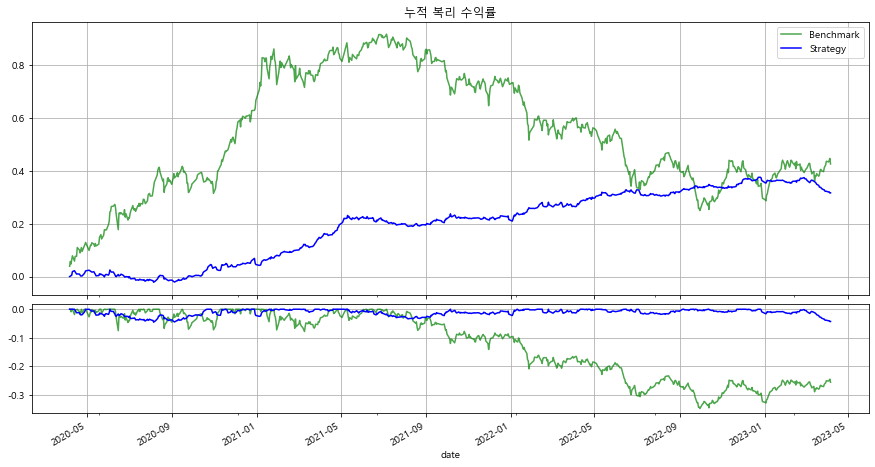

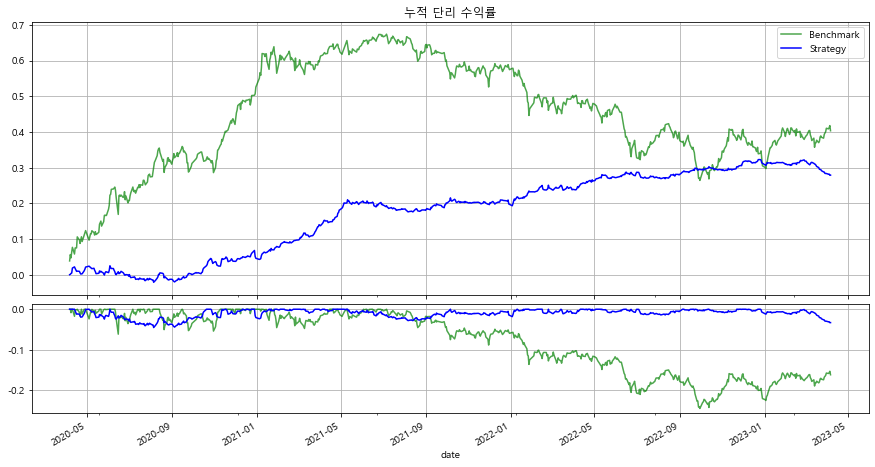

In [11]:
daily_rtn = rtn_df.mean(axis=1)

kosdaq = pd.read_csv(data_path + 'krx_index_close.csv', index_col=0, parse_dates=True).KOSPI
kosdaq_rtn = kosdaq.pct_change(1)
kosdaq_rtn = kosdaq_rtn.loc[start:end]

show_rtn_analysis(daily_rtn, benchmark_rtn=kosdaq_rtn)

---

**(b)** check how the fundamental value factor portfolio weight is spread around industries.  
Discuss about the result. Is the result desirable? How can we fix or enhance it?

### Backtest

In [12]:
rtn_df = pd.DataFrame().reindex_like(rtn_1d)
for i in range(len(rebal_dates)-1):
    buy_date = rebal_dates[i]
    sell_date = rebal_dates[i+1]
    
    buy_date_pbr = pbr.loc[buy_date,:]
    pbr_hq_20 = buy_date_pbr.quantile(0.8)
    pbr_lq_20 = buy_date_pbr.quantile(0.2)
    
    buy_basket = buy_date_pbr[buy_date_pbr < pbr_lq_20].index
    sell_basket = buy_date_pbr[buy_date_pbr > pbr_hq_20].index
    
    sector_weight = sector.loc[buy_basket].value_counts()
    sector_weight = sector_weight / sector_weight.sum()
    print(f'- {buy_date} -')
    for s in sector_weight.index:
        print(f"{s[0]}: {sector_weight.loc[s]:.2%}")
    print()
    
    rtn_df.loc[buy_date:sell_date, buy_basket] = rtn_1d.loc[buy_date:sell_date, buy_basket]
    rtn_df.loc[buy_date:sell_date, sell_basket] = rtn_1d.loc[buy_date:sell_date, sell_basket] * -1

- 2020-04-06 00:00:00 -
기타금융: 21.19%
철강금속: 13.25%
운수장비: 8.61%
유통업: 6.62%
화학: 6.62%
증권: 5.96%
섬유의복: 4.64%
보험: 3.97%
전기가스업: 3.97%
비금속광물: 3.31%
서비스업: 3.31%
전기전자: 3.31%
기계: 2.65%
음식료품: 2.65%
종이목재: 2.65%
건설업: 2.65%
운수창고업: 1.99%
은행: 1.32%
의약품: 0.66%
농업, 임업 및 어업: 0.66%

- 2020-05-20 00:00:00 -
기타금융: 21.19%
철강금속: 13.25%
운수장비: 10.60%
유통업: 7.95%
화학: 6.62%
섬유의복: 4.64%
증권: 4.64%
보험: 3.97%
전기가스업: 3.97%
전기전자: 3.97%
비금속광물: 3.31%
기계: 2.65%
종이목재: 2.65%
서비스업: 1.99%
음식료품: 1.99%
건설업: 1.99%
운수창고업: 1.32%
은행: 1.32%
농업, 임업 및 어업: 1.32%
의약품: 0.66%

- 2020-08-20 00:00:00 -
기타금융: 21.85%
철강금속: 12.58%
화학: 8.61%
유통업: 8.61%
운수장비: 7.95%
섬유의복: 4.64%
전기가스업: 4.64%
전기전자: 3.97%
보험: 3.97%
증권: 3.97%
비금속광물: 3.31%
서비스업: 3.31%
종이목재: 3.31%
음식료품: 2.65%
운수창고업: 1.99%
은행: 1.32%
기계: 1.32%
농업, 임업 및 어업: 1.32%
건설업: 0.66%

- 2020-11-20 00:00:00 -
기타금융: 21.85%
철강금속: 12.58%
화학: 9.27%
유통업: 7.95%
운수장비: 6.62%
증권: 5.30%
보험: 4.64%
전기전자: 4.64%
전기가스업: 3.97%
종이목재: 3.97%
비금속광물: 3.31%
서비스업: 3.31%
섬유의복: 3.31%
음식료품: 2.65%
기계: 1.32%
은행: 1.32%
농업, 임업 및 

PBR이 낮다고 알려진 금융산업에 포트폴리오 비중이 쏠려있다.  

따라서 밸류 팩터로 투자한다는 것이 자칫 특정 산업에 대한 투자로 변질될 수 있다.  

이를 해결하기 위해 각 산업군의 저PBR 종목을 각각 추출하는 방식을 생각해볼 수 있다.  

---

## Problem 2. 

---

**(a)** Find any quantitative strategy you want to implement and introduce it.

**The Stock Market Valuation of Research and Development Expenditures**  
(LOUIS K.C. CHAN, JOSEF LAKONISHOK, and THEODORE SOUGIANNIS), 2001

해당 논문에는 시가총액 대비 연구개발비가 높은 기업이 초과 수익을 달성할 가능성이 있다는 내용이 담겨있다.  

연구개발비는 지출로서 인식되지만 이는 다른 지출과 달리 미래에 대한 투자이다.  

따라서 연구개발비를 많이 지출하는 기업에 대해 그러한 비용을 투자로서 인식하지 못한다면 그 기업은 상대적으로 저평가 될 가능성이 높다.  

추후 연구개발에 대한 투자가 기업의 이익으로 다가왔을 때 저평가가 해소되며 주가가 상승할 수 있다.  

1975년부터 1995년까지 미국 주식시장에 대하여 해당 지표 상위 5분위에 투자했을 때, 30%에 가까운 연평균 수익률을 얻을 수 있었다고 한다. 

이러한 수익은 Fama French 3팩터와 모멘텀 팩터의 설명력(SMB, HML, WML, UMD)을 제외하고도 알파가 존재했다.

---

**(b)** Implement the strategy and compare the performance with the KOSPI index.  
Performance should include annualized return, annualized standard deviation, Share ratio, Sortino ratio, drawdowns, and
maximum drawdown.

In [13]:
fn = pd.read_csv(data_path + 'ks_compustat.csv')
xrd = pd.pivot_table(data=fn, values='xrd', columns='symbol', index='fyear')
xrd['A026890'] = np.nan
xrd.index = xrd.index.astype(str).str[:]+'-4'
xrd = xrd.loc['2019-4':,itst_stocks]
xrd[xrd==0] = np.nan

xrd, rebal_dates = transform_daily_format(xrd, mc)
prr = mc / xrd
prr

sh7code,A097520,A023350,A018500,A051910,A004090,A005930,A019680,A139130,A008730,A103140,...,A029780,A005250,A001270,A016590,A004910,A120030,A024720,A004360,A071950,A000720
date,,,,,,,,,,,,,,,,,,,,,
2020-04-06,9220.477601,27053.754102,13481.815739,88573.082587,93345.501130,14604.156147,NaN,NaN,128094.295550,43902.691687,...,NaN,8244.517084,NaN,NaN,NaN,1.572282e+07,662137.818732,NaN,22783.555845,20589.479106
2020-04-07,10173.210386,27367.044292,14654.360848,92307.192308,91245.380171,14874.048160,NaN,NaN,128094.295550,44021.737285,...,NaN,9193.657151,NaN,NaN,NaN,1.566373e+07,674207.483654,NaN,23477.323091,21141.192086
2020-04-08,10027.885008,27437.088846,15189.665031,93502.107419,89625.536353,14574.168157,NaN,NaN,131108.278975,43069.881973,...,NaN,8598.114716,NaN,NaN,NaN,1.564398e+07,682830.046122,NaN,23477.323091,21067.885255
2020-04-09,10060.175518,27820.423591,16056.399910,96937.488363,91447.678725,14724.108158,NaN,NaN,137136.245824,43188.842659,...,NaN,8560.899744,NaN,NaN,NaN,1.576232e+07,688003.583602,NaN,24633.601834,22207.591526
2020-04-10,9866.396294,28134.350550,16056.399910,96788.123974,88961.880665,14769.090144,NaN,NaN,139145.568108,43902.691687,...,NaN,8486.453972,NaN,NaN,NaN,1.566373e+07,688003.583602,NaN,24749.603909,22538.617994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-31,12972.779757,72024.966631,27600.942297,196994.238502,181782.461917,17055.205835,NaN,NaN,83425.489301,96625.649913,...,NaN,4923.690607,NaN,NaN,NaN,1.672827e+07,63288.679690,NaN,11589.106206,21359.763189
2023-04-03,13718.804509,72911.427759,27366.181850,196994.238502,184611.712151,16815.366994,NaN,NaN,85377.563558,99309.678008,...,NaN,4856.635570,NaN,NaN,NaN,1.676188e+07,63040.228388,NaN,12008.759557,22033.669254
2023-04-04,13511.583096,73354.658323,27952.143926,199761.011515,203356.365603,16948.610790,NaN,NaN,89076.230571,97520.295540,...,NaN,5025.868742,NaN,NaN,NaN,1.676188e+07,62750.554225,NaN,12288.151410,21945.765031


In [14]:
rtn_df = pd.DataFrame().reindex_like(rtn_1d)
for i in range(len(rebal_dates)-1):
    buy_date = rebal_dates[i]
    sell_date = rebal_dates[i+1]
    
    buy_date_prr = prr.loc[buy_date,:]
    prr_lq_20 = buy_date_prr.quantile(0.2)
    
    buy_basket = buy_date_prr[buy_date_prr < prr_lq_20].index
    
    rtn_df.loc[buy_date:sell_date, buy_basket] = rtn_1d.loc[buy_date:sell_date, buy_basket]

--------------------------------------------------
백테스트 기간: 2020-04-06 00:00:00 ~ 2023-04-06 00:00:00
- 총 캘린더: 1095일
- 총 거래일: 743일
- 총 연도: 3.00년

전체 기간 복리 수익률: 124.97%
전체 기간 단리 수익률: 87.63%
복리 최대 낙폭(MDD): -30.88%
단리 최대 낙폭(MDD): -16.49%
샤프 비율: 1.42
솔티노 비율: 2.00

연평균 복리 수익률: 31.03%
연평균 단리 수익률: 29.21%
연평균 표준편차: 0.2099

일별 승률: 57.87%
일별 평균 수익률:  0.12%
일별 수익거래 수익률: 0.96%
일별 손실거래 손실률: -1.05%
일별 손익비: 1.11
--------------------------------------------------


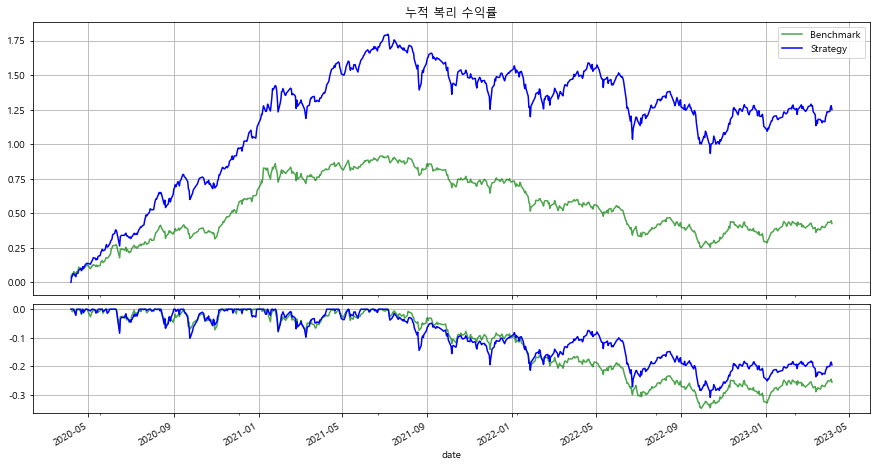

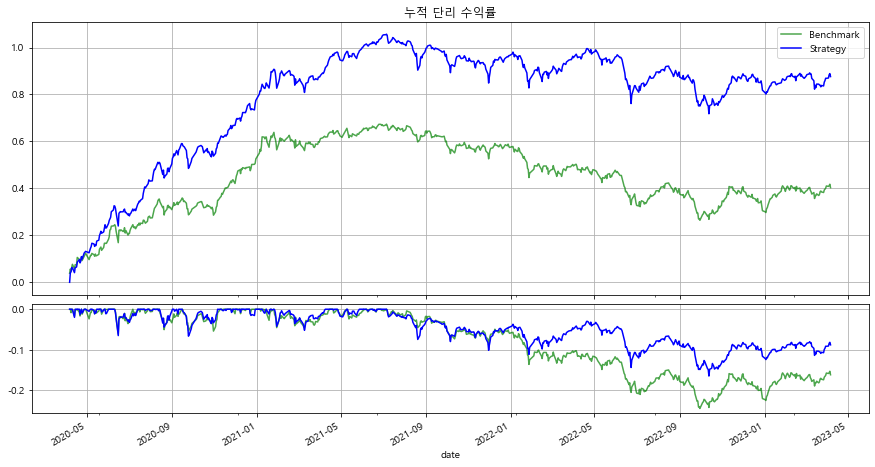

In [15]:
daily_rtn = rtn_df.mean(axis=1)

show_rtn_analysis(daily_rtn, benchmark_rtn=kosdaq_rtn)

---